# 1. Oscillation time and damping coefficients  in a nonlinear pendulum

We consider a nonlinear pendulum modeled by 
$$
\frac{d^2x}{dt^2} + 2\,\alpha  \frac{dx}{dt} + \beta\, \frac{dx}{dt}\, \left| \frac{dx}{dt} \right|  + \sin(x)=0, 
\qquad x(0) = x_0, \dot{x}(0) = 0.
$$
Denote by  $\tau(x_0, \alpha, \beta)$ the time taking by the pendulum to complete one oscillation starting at $x_0$ with vanishing velocity. Fixed $x_0$, this notebook explores the dependence of $\tau$ on the damping coefficients $\alpha$ and $\beta$.  

In [1]:
#import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import *

In [2]:
#from scipy.integrate import ode
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [3]:
tau_l = lambda a : 2*np.pi/np.sqrt(1-a**2)

In [4]:
def pend(x,t,a,b,c=1):
    return [x[1], -2*x[1]*a - b*x[1]*np.abs(x[1]) - np.sin(x[0])] 

Numerical approximation on the interval $[0, tm]$ of the   nonlinear pendulum equation starting at $x_0$ with vanishing velocity.  

In [5]:
def sol(x0,tm, a,b,c):
    xinit = [x0,0.0]
    tt = [0.0, tm]
    return odeint(pend, xinit,tt, args=(a, b, c))[1]    

The function tau approximates the second zero of the $x'(t)$ on for $t>0$. The approximation is done via Newthon's method with a starting value tm:
$$
t_{n+1} = t_n - \frac{x'(t_n)}{x''(t_n)}
$$

In [6]:
def tau(x0, tau_init, a,b, c): 
    t = tau_init
    i, niter = 0, 10
    while (i < niter):
        S = sol(x0,t, a,b,c) 
        t= t-S[1]/pend(S,t, a, b, c)[1]
        i = i+1
    return t

## 2. Continuation numerical procedure 

In [15]:
npts= 100
alpha_max = 0.5
alpha = np.linspace(0.0, alpha_max, npts) 
linear = tau_l(alpha)

In [16]:
ot0 = np.zeros(npts)
x00, b   = 0.2, 0.0 
tm = 2*np.pi
for ii in range(npts):
    tm = tau(x0, tm, alpha[ii],b, 1)
    ot0[ii] = tm

In [17]:
ot1 = np.zeros(npts)
x01, b   = 0.4, 0.0 
tm = 2*np.pi
for ii in range(npts):
    tm = tau(x01, tm, alpha[ii],b, 1)
    ot1[ii] = tm

In [18]:
ot2 = np.zeros(npts)
x02, b   = 0.9, 0.0 
tm = 2*np.pi
for ii in range(npts):
    tm = tau(x02, tm, alpha[ii],b, 1)
    ot2[ii] = tm

In [19]:
ot3 = np.zeros(npts)
x03, b   = 1.4, 0.0 
tm = 2*np.pi
for ii in range(npts):
    tm = tau(x03, tm, alpha[ii],b, 1)
    ot3[ii] = tm

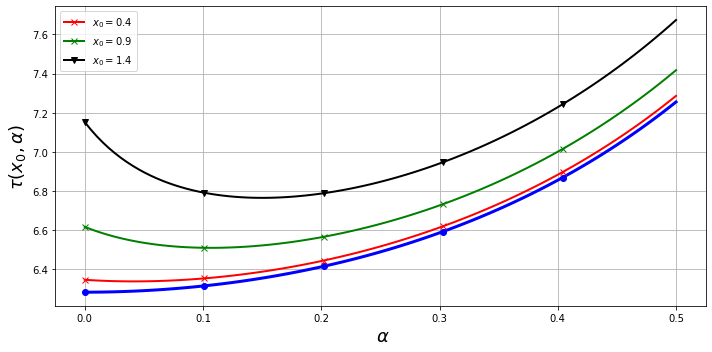

In [22]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(alpha,linear, color='blue', linewidth = 3, marker = "o",markevery=20, )
ax.plot(alpha,ot1, color='red', linewidth = 2, marker = "x",markevery=20, \
         label= f'$x_0 = {x01}$' )
ax.plot(alpha,ot2, color='green', linewidth = 2, marker = "x",markevery=20, \
         label= f'$x_0 = {x02}$' )

ax.plot(alpha,ot3, color='k', linewidth = 2, marker = "v",markevery=20, \
         label= f'$x_0 = {x03}$' )
#plt.xticks([0,  0.05, 0.10, 0.15, 0.2, 0.3], [r'$0$', r'$0.05$', r'$0.1$',r'$0.15$', r'$0.2$' , r'$0.3$'],fontsize=12)
#plt.yticks([17*np.pi/10, 18*np.pi/10, 19*np.pi/10,2*np.pi,   21*np.pi/10, 22*np.pi/10, 23*np.pi/10], [r'$17\pi/10$',r'$18\pi/10$',r'$19\pi/10$',r'$2\pi$', r'$21\pi/10$',r'$22\pi/10$', r'$23\pi/10$'],fontsize=16)
plt.xlabel(r' $\alpha$', fontsize=18)
string = fr'$\tau(x_0, \alpha  )$'
plt.ylabel(string, fontsize=18)
plt.grid(True)
plt.legend(loc='best')
plt.savefig('oscillation_time.png', bbox_inches="tight")
plt.tight_layout()
plt.show()